In [149]:
# Описание данных
# Данный набор содержит финансовые показатели 5909 компаний за пятый год прогнозного периода.
# Целевой признак: 'банкротство' (64-й столбец), где:
#   0 — компания не обанкротилась 93.06%
#   1 — компания обанкротилась 6.93%
# Признаки: 63 метрики, но не подписано что они значат.
# Пропущенных значений 1.21%, в каждом столбце пропусков менее 2%, за исключением 36-го, где пропущено ~50% значений.

# Цель проекта
# Основная цель: продемонстрировать навыки предподготовки данных для портфолио аналитика данных.
# Задачи:
# - Очистка данных, обработка пропусков и выбросов.
# - Анализ важности признаков и устранение коррелирующих метрик.
# - Приведение данных к виду, пригодному для использования в моделях машинного обучения.
# Итог: обработанные данные могут быть использованы для построения моделей прогнозирования банкротства.

In [89]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt

# Установки (опционально, можно удалить, если не нужны)
# !pip install scipy

# Статистическая обработка и предобработка
from scipy import stats
from scipy.io import arff
from sklearn.preprocessing import RobustScaler, StandardScaler

# Модели и анализ
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_decomposition import PLSRegression
from sklearn.cluster import KMeans

# Метрики
from sklearn.metrics import mean_squared_error

# Данный проект протестирован с библиотеками следующих версий:
#pandas==2.2.2
#numpy==1.26.4
#scipy==1.14.1
#matplotlib==3.9.2
#scikit-learn==1.5.2
# Использование других версий библиотек может привести к отличным результатам.

In [90]:
#pip freeze > requirements.txt
#print(f"pandas=={pd.__version__}")
#print(f"numpy=={np.__version__}")
#import sklearn #модули не содержат информации о версии библиотеки, поэтому важно импортировать именно корневой модуль
#import scipy
#import matplotlib
#print(f"scipy=={scipy.__version__}")
#print(f"matplotlib=={matplotlib.__version__}")
#print(f"scikit-learn=={sklearn.__version__}")

In [91]:
data = arff.loadarff('5year.arff')
dat = pd.DataFrame(data)

In [92]:
print(dat.head)

<bound method NDFrame.head of                                                 0     \
0  [0.088238, 0.55472, 0.01134, 1.0205, -66.52, 0...   
1                                              Attr1   

                                                1     \
0  [-0.006202, 0.48465, 0.23298, 1.5998, 6.1825, ...   
1                                              Attr2   

                                                2     \
0  [0.13024, 0.22142, 0.57751, 3.6082, 120.04, 0....   
1                                              Attr3   

                                                3     \
0  [-0.089951, 0.887, 0.26927, 1.5222, -55.992, -...   
1                                              Attr4   

                                                4     \
0  [0.048179, 0.55041, 0.10765, 1.2437, -22.959, ...   
1                                              Attr5   

                                                5     \
0  [0.23156, 0.51047, 0.47291, 1.9393, 15.102, 0....   
1            

In [93]:
dat = dat.drop(index=1)
dat = dat.map(str)
dat = dat.apply(lambda col: col.str.strip('()').str.split(','))
dat = dat.apply(pd.Series.explode)

In [94]:
print(dat.head)

<bound method NDFrame.head of         0          1         2          3         4         5         6     \
0   0.088238  -0.006202   0.13024  -0.089951  0.048179   0.23156  0.099486   
0    0.55472    0.48465   0.22142      0.887   0.55041   0.51047   0.59991   
0    0.01134    0.23298   0.57751    0.26927   0.10765   0.47291   0.37489   
0     1.0205     1.5998    3.6082     1.5222    1.2437    1.9393    1.6529   
0     -66.52     6.1825    120.04    -55.992   -22.959    15.102    19.036   
..       ...        ...       ...        ...       ...       ...       ...   
0     4.7343     3.2749     2.987     3.3302     4.095     4.922    2.4784   
0     142.76     111.14    71.531     147.56    106.43    102.58    130.02   
0     2.5568     3.2841    5.1027     2.4735    3.4294    3.5581    2.8072   
0     3.2597       3.37    5.6188     5.9299    3.3622    75.941    31.645   
0       b'0'       b'0'      b'0'       b'0'      b'0'      b'0'      b'0'   

        7         8          9   

In [95]:
dat = dat.reset_index(drop=True)

In [96]:
print("Пропущенные значения после обработки:")
print(dat.isna().sum().sum())

Пропущенные значения после обработки:
0


In [97]:
dat.dtypes

0       object
1       object
2       object
3       object
4       object
         ...  
5905    object
5906    object
5907    object
5908    object
5909    object
Length: 5910, dtype: object

In [98]:
dat = dat.map(lambda x: str(x).replace("b'", "").replace("'", ""))
dat = dat.replace('nan', pd.NA).replace(' nan', pd.NA) 
#на всякий решил не использовать dat[column] = pd.to_numeric(dat[column], errors='coerce') и таким перебором проверил на что он ругается

# Преобразуем все столбцы в числовой формат
for column in dat.columns:
    dat[column] = pd.to_numeric(dat[column])

In [99]:
print("Пропущенные значения по каждому столбцу:")
print(dat.isna().sum())

print("\nОбщее количество пропущенных значений:")
print(dat.isna().sum().sum())

print("\nОбщий процент пропусков:")
print(round(dat.isna().mean().mean() * 100, 2), "%")

Пропущенные значения по каждому столбцу:
0       0
1       1
2       1
3       1
4       0
       ..
5905    0
5906    1
5907    1
5908    1
5909    1
Length: 5910, dtype: int64

Общее количество пропущенных значений:
4666

Общий процент пропусков:
1.21 %


In [100]:
print("\nПропущенные значения по каждой строке (отсортировано по убыванию):")
print(dat.isna().sum(axis=1).sort_values(ascending=False))


Пропущенные значения по каждой строке (отсортировано по убыванию):
36    2548
26     391
44     268
59     268
23     135
      ... 
41       0
29       0
30       0
38       0
64       0
Length: 65, dtype: int64


In [101]:
print(dat.iloc[36, :])

0       571.37000
1         5.25190
2             NaN
3         1.90050
4         6.37830
          ...    
5905      0.37850
5906     17.03600
5907      3.60650
5908      0.23908
5909    205.69000
Name: 36, Length: 5910, dtype: float64


In [102]:
dat = dat.transpose()

In [147]:
#print(dat.iloc[:, -1].value_counts(normalize=True) * 100) #процент банкротов для введения

In [104]:
#Чтобы выбрать метод точнее, решил выбрать между PLS и кластерами. Но для PLS пропуски должны быть уже заполнены, так что заполню их в копии. 
#Нарисовал графики чтобы выбрать между KNN, средней и медианой.

#missing_cols = dat.columns[dat.isna().any()]  # Колонки с пропусками
# Строим гистограммы для каждого признака с пропусками
#for col in missing_cols:
    #plt.figure(figsize=(8, 5))
    #plt.hist(dat[col].dropna(), bins=5000, edgecolor='k')  # Убираем NaN для корректного отображения
    #plt.title(f'Гистограмма для признака {col}')
    #plt.xlabel(col)
    #plt.ylabel('Частота')
    #plt.show()

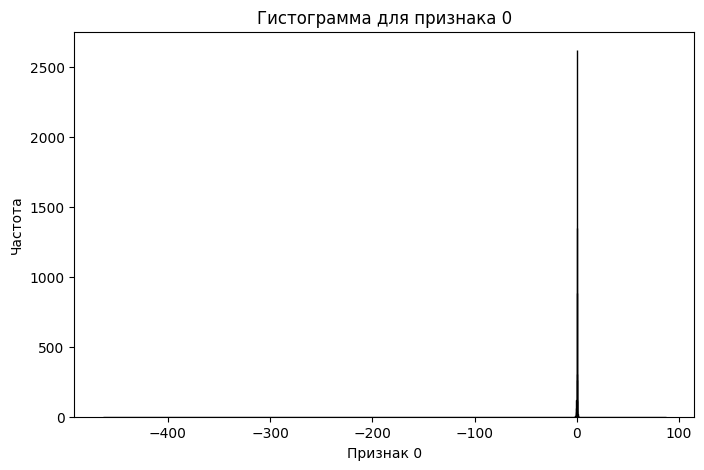

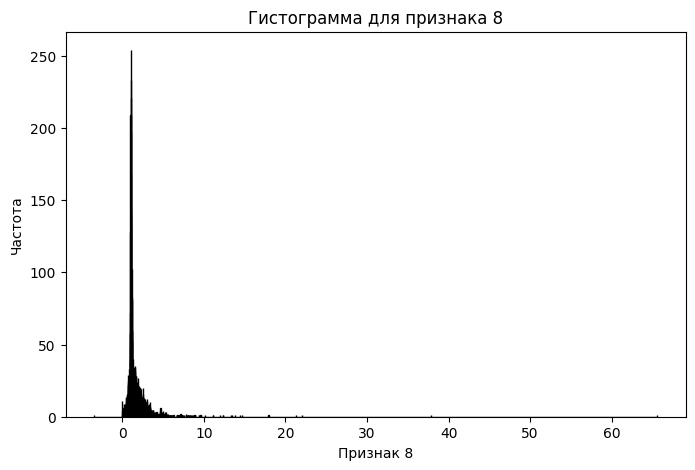

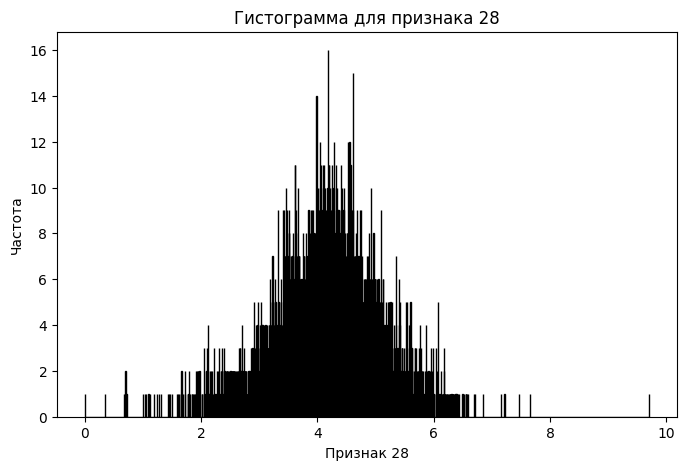

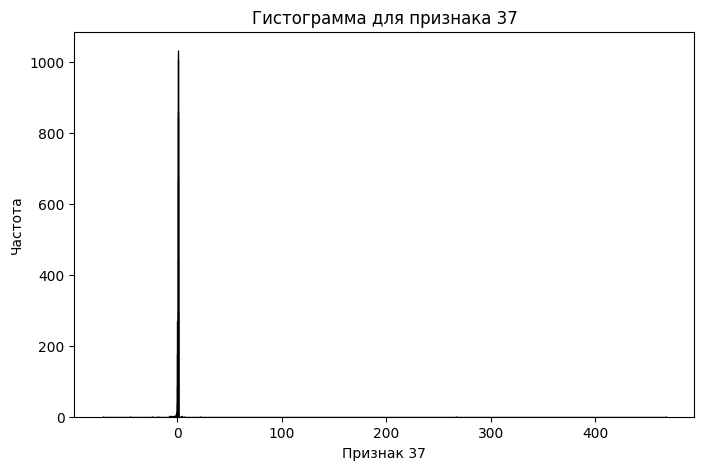

In [105]:
#Выбрал несколько коллонок для примера, что выбросы есть и среднее не подходит доже для 28
#Все грузились бы долго так как bins=5000, а на bins=30 и 100 было незаметно
for col in [0, 8, 28, 37]:
    plt.figure(figsize=(8, 5))
    plt.hist(dat[col].dropna(), bins=5000, edgecolor='k')  # Убираем NaN для корректного отображения
    plt.title(f'Гистограмма для признака {col}')
    plt.xlabel(f'Признак {col}')
    plt.ylabel('Частота')
    plt.show()

In [106]:
dat_copy = dat.copy()
dat_copy = dat_copy.fillna(dat_copy.median())

In [107]:
print("Пропущенные значения по каждому столбцу:")
print(dat_copy.isna().sum().sum())

Пропущенные значения по каждому столбцу:
0


In [108]:
X = dat_copy.iloc[:, :-1]
y = dat_copy.iloc[:, -1]

pls = PLSRegression(n_components=2)
pls.fit(X, y)

PLSRegression()

In [109]:
# Коэффициенты признаков
feature_importances = pls.coef_.flatten()  # Получаем коэффициенты как одномерный массив
feature_names = X.columns

# Создаём DataFrame для удобного отображения
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Сортируем по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

    Feature  Importance
50       50    0.014405
57       57    0.005469
8         8    0.002654
1         1    0.000920
41       41    0.000500
..      ...         ...
24       24   -0.001589
55       55   -0.012295
2         2   -0.013066
38       38   -0.013998
28       28   -0.024179

[64 rows x 2 columns]


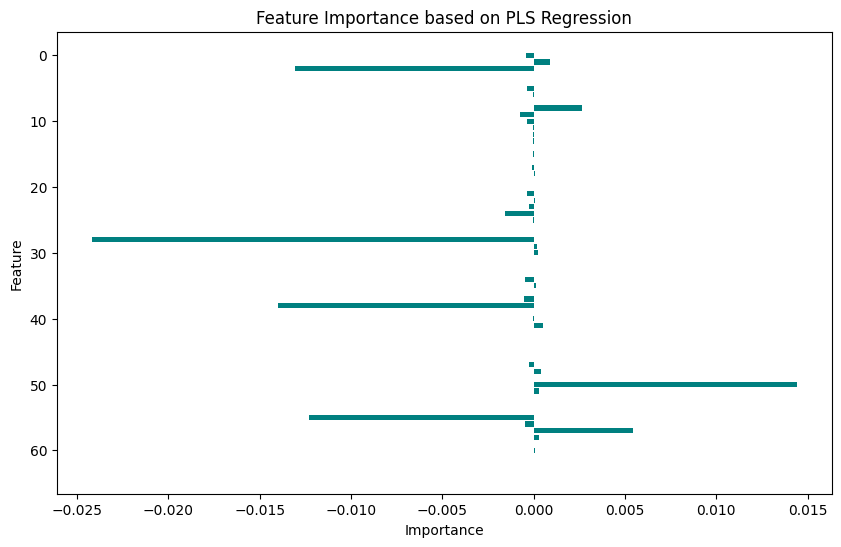

In [110]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on PLS Regression')
plt.gca().invert_yaxis()  # Переворачиваем порядок для удобного отображения
plt.show()

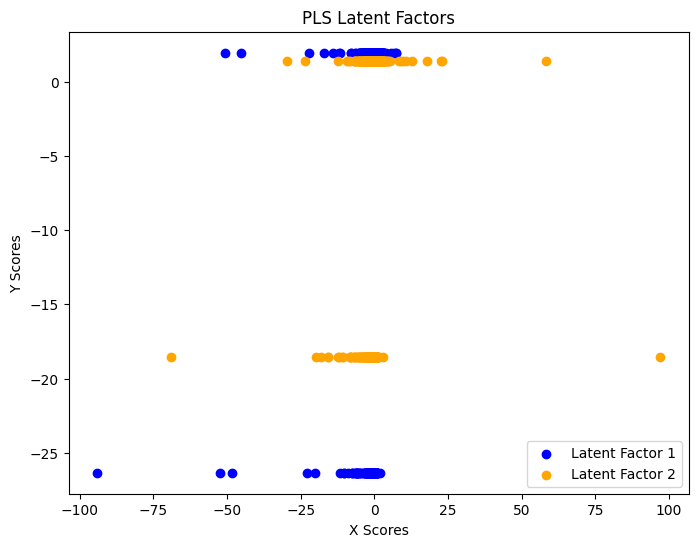

In [111]:
X_scores, Y_scores = pls.transform(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X_scores[:, 0], Y_scores[:, 0], color='blue', label='Latent Factor 1')
plt.scatter(X_scores[:, 1], Y_scores[:, 1], color='orange', label='Latent Factor 2')
plt.xlabel('X Scores')
plt.ylabel('Y Scores')
plt.legend()
plt.title('PLS Latent Factors')
plt.show()

In [112]:
X_latent = pls.transform(X)
inertia = []
k_range = range(1, 11)  # Диапазон для количества кластеров

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_latent)
    inertia.append(kmeans.inertia_)

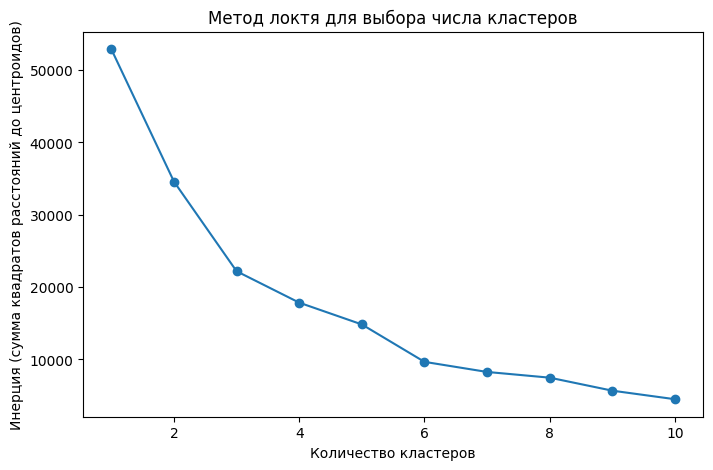

In [113]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция (сумма квадратов расстояний до центроидов)')
plt.title('Метод локтя для выбора числа кластеров')
plt.show()

In [114]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_latent)

In [115]:
data_pls_filled = dat.copy()
data_clusters_filled = dat.copy()

In [116]:
data_clusters_filled['Cluster'] = clusters
missing_cols2 = data_clusters_filled.columns[data_clusters_filled.isna().any()]

# Заполнение пропусков по каждому кластеру
for cluster_id in range(optimal_k):
    cluster_data = data_clusters_filled[data_clusters_filled['Cluster'] == cluster_id]
    for col in missing_cols2:
        # Проверяем, есть ли хотя бы одно ненулевое значение в колонке для кластера
        if cluster_data[col].notna().sum() > 0:
            cluster_median = cluster_data[col].median()
            data_clusters_filled.loc[data_clusters_filled['Cluster'] == cluster_id, col] = cluster_data[col].fillna(cluster_median)
data_clusters_filled = data_clusters_filled.fillna(dat_copy.median())

In [117]:
# Получаем важные признаки из PLS
important_features = importance_df['Feature'][:5]  # например, топ-5 признаков

# Выбираем только те признаки, которые содержат пропуски
missing_cols = data_pls_filled.columns[data_pls_filled.isna().any()]

# Заполняем пропуски в этих признаках их средними значениями
for feature in missing_cols:
    mean_value = data_pls_filled[feature].mean()
    data_pls_filled.fillna({feature: mean_value}, inplace=True)

In [118]:
# Копируем данные для внесения искусственных пропусков
data_with_missing_pls = data_pls_filled.copy()
data_with_missing_clusters = data_clusters_filled.copy()

# Количество пропусков (например, 5% от общего числа значений)
total_values = data_with_missing_pls.size
num_missing = int(total_values * 0.05)

# Генерируем случайные позиции для пропусков
np.random.seed(0)
missing_positions = (np.random.randint(0, data_with_missing_pls.shape[0], num_missing),
                     np.random.randint(0, data_with_missing_pls.shape[1], num_missing))
# Сохраняем оригинальные значения
original_values_pls = data_with_missing_pls.values[missing_positions]
original_values_clusters = data_with_missing_clusters.values[missing_positions]

# Устанавливаем значения в NaN на выбранных позициях
data_with_missing_pls.values[missing_positions] = np.nan
data_with_missing_clusters.values[missing_positions] = np.nan  # тот же пропуск в обеих копиях

In [119]:
missing_cols = data_pls_filled.columns[data_pls_filled.isna().any()]

# Заполняем пропуски в этих признаках их средними значениями
for feature in missing_cols:
    mean_value = data_pls_filled[feature].mean()
    data_pls_filled.fillna({feature: mean_value}, inplace=True)

In [120]:
for cluster_id in range(optimal_k):
    cluster_data = data_clusters_filled[data_clusters_filled['Cluster'] == cluster_id]
    for col in missing_cols2:
        # Проверяем, есть ли хотя бы одно ненулевое значение в колонке для кластера
        if cluster_data[col].notna().sum() > 0:
            cluster_median = cluster_data[col].median()
            data_clusters_filled.loc[data_clusters_filled['Cluster'] == cluster_id, col] = cluster_data[col].fillna(cluster_median)
data_clusters_filled = data_clusters_filled.fillna(dat_copy.median())
data_clusters_filled.drop(columns=['Cluster'], inplace=True)

In [121]:
print("Оставшиеся пропуски после заполнения:", data_pls_filled.isna().sum().sum())
print("Оставшиеся пропуски после заполнения:", data_clusters_filled.isna().sum().sum())

Оставшиеся пропуски после заполнения: 0
Оставшиеся пропуски после заполнения: 0


In [122]:
print("Оставшиеся пропуски после заполнения в PLS:", np.isnan(original_values_pls).sum())
print("Оставшиеся пропуски после заполнения в Clusters:", np.isnan(original_values_clusters).sum())

Оставшиеся пропуски после заполнения в PLS: 0
Оставшиеся пропуски после заполнения в Clusters: 0


In [123]:
# Собираем только значения на тех позициях, где были искусственно внесены пропуски
test_values_pls = data_pls_filled.values[missing_positions]
test_values_clusters = data_clusters_filled.values[missing_positions]

# Вычисляем MSE, если размеры совпадают
print("MSE после PLS:", mean_squared_error(original_values_pls, test_values_pls))
print("MSE после кластерного заполнения:", mean_squared_error(original_values_clusters, test_values_clusters))

MSE после PLS: 0.0
MSE после кластерного заполнения: 0.0


In [124]:
# MSE выдал сомнительные результаты, а я итак иследовал болшьше чем мне пока нужно. 
# Поэтому, чтобы быстрее освоить практические задачи, я решил заполнить понятной мне медеанной.   
dat = dat.fillna(dat.median())

In [125]:
print("Оставшиеся пропуски после заполнения:", dat.isna().sum().sum())

Оставшиеся пропуски после заполнения: 0


In [126]:
print(dat.duplicated().sum())

60


In [127]:
dat.drop_duplicates(inplace=True)

In [128]:
# Определяем выбросы ниже 25-го перцентиля - 1.5 * IQR или выше 75-го перцентиля + 1.5 * IQR
outliers = ((dat < (dat.quantile(0.25) - 1.5 * (dat.quantile(0.75) - dat.quantile(0.25)))) |
            (dat > (dat.quantile(0.75) + 1.5 * (dat.quantile(0.75) - dat.quantile(0.25)))))

print("Количество выбросов по каждому признаку:")
print(outliers.sum())

Количество выбросов по каждому признаку:
0     681
1     161
2     186
3     570
4     669
     ... 
60    472
61    431
62    400
63    796
64    408
Length: 65, dtype: int64


In [129]:
print(outliers.sum().sum())

38516


In [130]:
#Отображаю все графики, чтобы узнать асимметрию. Будет долго грузиться, поэтому закоментил
#for col in missing_cols:
    #plt.figure(figsize=(8, 5))
    #plt.hist(dat[col], bins=5000, edgecolor='k')
    #plt.title(f'Гистограмма для признака {col}')
    #plt.xlabel(col)
    #plt.ylabel('Частота')
    #plt.show()

In [131]:
# Поскольку это данные для машинного обучения, мы исказим их, чтобы они были более нормальными и устойчивы к выбросам

# Для логарифмической трансформации, если асимметрия больше направлена вправо
for index in [1, 19, 32, 35, 42, 43, 46, 50, 51, 60, 62]:
    dat.iloc[:, index] = np.log1p(dat.iloc[:, index].clip(lower=1e-5))

# Применение обратного преобразования для признаков с отрицательной асимметрией
for index in [2]:
    dat.iloc[:, index] = 1 / (dat.iloc[:, index] + 1e-5)

# Для боксовой трансформации, если хвосты асимметричны с обеих сторон
for index in [8, 9, 23, 24, 37, 38, 41, 48, 54, 55, 56, 57, 58]:
    dat.iloc[:, index], _ = stats.boxcox(dat.iloc[:, index].clip(lower=1e-5) + 1)  # Добавляем 1, чтобы избежать нулей

In [132]:
# Применяем RobustScaler ко всем признакам, кроме 64-го столбца
scaler = RobustScaler()
X_scaled = scaler.fit_transform(dat.drop(dat.columns[64], axis=1))  # Все столбцы, кроме 64-го

# вернуть в датафрейм
dat_scaled = pd.DataFrame(X_scaled, columns=dat.columns[:-1])
dat_scaled[dat.columns[64]] = dat[dat.columns[64]]  # Добавляем целевой столбец обратно

# Теперь у вас есть "обработанные" данные
print(dat_scaled.head)

<bound method NDFrame.head of             0         1          2         3         4         5         6   \
0     0.367680  0.244497  21.119457 -0.345986 -0.727076  3.187847  0.404481   
1    -0.467667  0.079250   0.395464 -0.028448  0.061748  0.000000 -0.478614   
2     0.739199 -0.620078  -0.237649  1.072437  1.297103  1.748823  0.806213   
3    -1.208450  0.938550   0.252442 -0.070984 -0.612847 -0.689287 -1.117883   
4     0.013348  0.234550   1.630905 -0.223641 -0.254438  0.000000  0.021220   
...        ...       ...        ...       ...       ...       ...       ...   
5845 -0.298723  0.577666   5.695968 -0.262833 -0.210474  0.000000 -0.324554   
5846 -5.525818  1.087368  -0.974548 -0.814504 -0.736244 -5.387483 -4.843616   
5847 -1.996555  1.577427  -1.561738 -0.496703 -1.312109 -1.668764 -1.613877   
5848 -1.375705  0.656040  15.328940 -0.309096 -0.189816 -1.014586 -1.264660   
5849 -1.344835  0.201767  -6.092027 -0.403936 -0.613671 -0.982059 -1.270462   

            7        

In [133]:
outliers = ((dat < (dat.quantile(0.25) - 1.5 * (dat.quantile(0.75) - dat.quantile(0.25)))) |
            (dat > (dat.quantile(0.75) + 1.5 * (dat.quantile(0.75) - dat.quantile(0.25)))))
print(outliers.sum().sum())

32805


In [134]:
outliers2 = ((dat_scaled < (dat_scaled.quantile(0.25) - 1.5 * (dat_scaled.quantile(0.75) - dat_scaled.quantile(0.25)))) |
            (dat_scaled > (dat_scaled.quantile(0.75) + 1.5 * (dat_scaled.quantile(0.75) - dat_scaled.quantile(0.25)))))
print(outliers2.sum().sum())

32745


In [135]:
dat = dat_scaled #чтобы не запутаться

In [136]:
#Выбросы и раньше на графиках были малозаметны и второй метод не дал значительного улучшения, так что с обработкой выбросов решил закончить
#Можно было ещё на метрики для модели поиследовать, но мне нужно было данные обработать, а добиваться качества модели относительно отдельный этап

#Некорректные значения тоже не были заметны в таблице и на графиках, к тому же я не знаю что значат признаки
#Так что этот шаг я считаю обработан вместе с выбросами

#Поскольку я ничего не знаю про признаки, модель, задачи и ресурсы проекта, я решил не удалять признаки с высокой корреляцией
#Так что из неинформативных признаков я решил обработать лишь с низкой дисперсией

In [137]:
variances = dat.var()  # Вычисление дисперсий для всех признаков
print(variances.sort_values())  # Вывод дисперсий по возрастанию

64    5.650094e-02
41    2.642184e-01
38    2.969423e-01
23    3.012249e-01
48    3.223222e-01
          ...     
36    3.924673e+05
31    6.265112e+05
26    8.103264e+06
59    3.135075e+07
44    4.310087e+07
Length: 65, dtype: float64


In [138]:
#С низкой дисперсией нет, проверю есть ли признаки, которые не коррелируют
correlation = dat.corr()[64].sort_values(ascending=False)
low_corr_features = correlation[correlation.abs() <= 0.1].index
print(low_corr_features)

Index([51, 35, 60,  2, 29, 52, 53, 61, 14, 33, 63, 39,  3, 45, 49, 31,  7, 16,
       59, 20, 44, 12, 40, 27,  8, 30, 22, 18, 15, 25, 36, 11, 26, 58, 42, 56,
        4,  6, 13, 17, 43, 19,  5, 47, 21, 10,  0, 34, 32, 46],
      dtype='int64')


In [139]:
#Их много, требуется дополнительная проверка, но удалять всё равно не собирался, так что пусть это было чисто для практики

In [140]:
# Применение стандартизации к данным
dat = StandardScaler().fit_transform(dat)

# Преобразуем массив обратно в DataFrame
dat = pd.DataFrame(dat)

In [141]:
#На этапе проверки данных была обнаружена потеря значений (NaN) вероятно, из-за промежуточных операций (масштабирование, удаление дубликатов и т.д.).
dat = dat.fillna(dat.median())
X = dat.drop(columns=64)
y = dat[64]

In [142]:
# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер тренировочного набора: {X_train.shape}")
print(f"Размер тестового набора: {X_test.shape}")

Размер тренировочного набора: (4680, 64)
Размер тестового набора: (1170, 64)


In [143]:
correlation = dat.corr()[64]  # 64 — целевая переменная (банкротство)
low_corr_features = correlation[correlation.abs() < 0.2].index

print("Признаки с низкой корреляцией:")
print(low_corr_features)

Признаки с низкой корреляцией:
Index([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58,
       59, 60, 61, 62, 63],
      dtype='int64')


In [144]:
# Построение матрицы корреляций
correlation_matrix = dat.corr()

# Выявление пар признаков с высокой корреляцией
high_corr_pairs = [
    (i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns 
    if i != j and abs(correlation_matrix.loc[i, j]) > 0.9
]

print("Пары признаков с высокой корреляцией:")
print(high_corr_pairs)

Пары признаков с высокой корреляцией:
[(0, 10), (0, 21), (0, 34), (0, 47), (3, 7), (3, 11), (3, 15), (3, 16), (3, 25), (3, 33), (3, 39), (3, 45), (3, 49), (6, 13), (6, 17), (7, 3), (7, 16), (7, 45), (7, 49), (10, 0), (10, 21), (10, 34), (10, 47), (11, 3), (11, 15), (11, 25), (11, 39), (11, 45), (13, 6), (13, 17), (15, 3), (15, 11), (15, 25), (15, 33), (15, 39), (15, 45), (15, 49), (16, 3), (16, 7), (16, 45), (16, 49), (17, 6), (17, 13), (18, 22), (18, 30), (19, 46), (21, 0), (21, 10), (21, 34), (21, 47), (22, 18), (22, 30), (25, 3), (25, 11), (25, 15), (25, 33), (25, 39), (25, 45), (25, 49), (27, 53), (27, 63), (29, 61), (30, 18), (30, 22), (32, 62), (33, 3), (33, 15), (33, 25), (33, 39), (33, 45), (33, 49), (34, 0), (34, 10), (34, 21), (34, 47), (39, 3), (39, 11), (39, 15), (39, 25), (39, 33), (39, 45), (39, 49), (41, 48), (43, 60), (44, 59), (45, 3), (45, 7), (45, 11), (45, 15), (45, 16), (45, 25), (45, 33), (45, 39), (45, 49), (46, 19), (47, 0), (47, 10), (47, 21), (47, 34), (48, 41

In [145]:
# Построение модели Random Forest
rf = RandomForestClassifier(random_state=42)
y = (y > 0.5).astype(int)  # Преобразуем все значения > 0.5 в 1, иначе 0 (Стандартизация изменила значения)
rf.fit(X, y)

feature_importances = rf.feature_importances_ # Оценка важности признаков
threshold = 0.01  # Установите порог важности
important_features = X.columns[feature_importances > threshold]

print("Важные признаки:")
print(important_features)

Важные признаки:
Index([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 39, 40, 42, 43,
       44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63],
      dtype='int64')


In [146]:
# Итоги

# В процессе работы над проектом были выполнены следующие шаги:
# 1. Изначально данные были в формате .arff. 
#в процессе обработке удалены заголовки, лишние символы, данные транспонированы и приведены к подходящим типам для анализа.
# 1. Обработка пропусков: иследоваласть возможность применить к данным заполнение на основе кластеров и PLS.
# 2. Работа с выбросами: использование обратного преобразования, логарифмической, боксовой трансформаций и RobustScaler.
# 3. Нормализация: применение StandardScaler и RobustScaler для приведения данных к единой шкале.
# 4. Анализ корреляций: выявление признаков с низкой дисперсией и корреляцией с целевым признаком (< 0.2).
# 5. Определение важности признаков.

# Основные результаты:
# - После обработки данных их структура стала пригодной для построения моделей машинного обучения.
# - Структура данных не позволила применить весь инструмент для обработки пропусков и выбросов.
# - Анализ показал, что отсутствуют признаки с высокой значимостью, что может указывать на необходимость более сложного подхода для построения моделей.
# - Признаки с низкой корреляцией не всегда оказывались малозначимыми для моделей, что подтверждает сложные зависимости между переменными.
# - Результаты подчёркивают необходимость глубокого исследования структуры данных и возможные нелинейные связи значимых признаков.

# Что можно улучшить:
# - Дополнительно в будущем можно было бы исследовать более сложные методы, как анализ нелинейных зависимостей или использовать другие модели
# - Для более глубокого анализа необходимо получить больше информации о значении каждого признака